# W2M6 - Docker 이미지를 AWS EC2에 배포하기
---

#### 학습목표
- 당신의 첫 Data Product (prototype) 배포하기
    - Local에서 docker container image를 만들어서 AWS EC2에 배포해 본다.
    - 자신이 만든 Data Product을 다른 사람이 사용할 수 있도록 배포한다.

#### 사전지식
#### 기능요구사항
- AWS EC2에 배포된 후에 서버 주소 (public DNS name)로 들어가면 JupyterLab 인터페이스가 실행되어야 합니다.
- 해당 화면에서 W1에서 만들었던 Jupyter notebook을 선택해서 실행할 수 있어야 합니다.


#### 프로그래밍관점
#### AWS계정 만들기
- gmail에서 새로운 이메일을 생성하세요. (추천: aws.danolee@gmail.com 처럼 aws.을 prefix로 사용하는 계정을 만들어서 사용하면 편합니다.)
- 새로 생성한 이메일로 aws 계정을 생성하세요. 새로운 계정에서 free-tier EC2 인스턴스를 12개월 동안 무료로 사용할 수 있습니다.

#### AWS free-tier EC2 생성하기
- free-tier EC2 인스턴스를 생성하세요.
- 반드시 User-data를 사용해서 Docker를 설치하고 구성하세요.

#### Docker 이미지 생성하기
- Local에서 Docker Desktop을 이용해서 AWS EC2에 배포할 docker container image를 생성하세요.
    - 어떤 OS를 선택해야 할까요?
    - 어떤 소프트웨어를 설치해야 할까요?
    - 어떤 화일을 담아야 할까요?

#### Docker Image 배포하기
- AWS ECR (Elastic Container Registry)에 Docker container image를 push하세요.
- EC2에서 container image를 pull하세요.

#### 시청결과 및 동작예시
- Jupyter notebook을 실행할 수 있어야 합니다.

#### 팀 활동견적
- Docker를 사용하는 이유가 뭘까요?
- 어떤 점은 더 불편한가요?
- 이번 미션에서는 하나의 EC2에 하나의 Docker container를 배포했습니다. 만약에 여러대의 EC2에 여러 개의 컨테이너를 배포해야 한다면 어떻게 해야 할까요

---

#### 내가 해야하는 것

- [✔️] Gmail 계정 생성 (with prefix) 
    - aws.hxxjaewoong17@gmail.com
- [✔️] free-tier EC2 인스턴스 생성
    - hxxjaewoong17_softeer
- [✔️] User-data 사용해서 Docker 설치 및 구성
    - 밑에 셀 참고
- [ ] Local에서 Docker Desktop을 이용해서 AWS EC2에 배포할 Docker Container image 생성
    - 밑에 셀 참고
- [ ] AWS ECR에 Docker container image push
- [ ] EC2에서 Container image pull
- [ ] 로컬에서 Jupyter notebook 실행되는지 확인 (public DNS name에서 jupyetLab 인터페이스가 실행되는지)
    - public DNS: 54.180.102.117
- [ ] 다른 사람이 사용할 수 있는지 확인하기

---

# User Data 사용해서 Docker 설치 및 구성하기

In [1]:
#!/bin/bash
yum update -y
yum install docker -y
service docker start
usermod -a -G docker ec2-user

SyntaxError: invalid syntax (552886083.py, line 2)

---

# 개인 공부
---

### docker tag <이미지_이름> <DockerHub_사용자명>/<리포지토리_이름>:<태그>

- <이미지_이름>: Docker 이미지의 로컬 이름. (예: my-jupyterlab)
- <DockerHub_사용자명>: Docker Hub 계정 이름.
- <리포지토리_이름>: Docker Hub에서 이미지를 저장할 리포지토리 이름. (예: my-jupyterlab)
- :<태그>: 선택 사항으로, 이미지의 특정 버전을 나타냅니다. 기본값은 latest.

### docker build -t <이미지_이름> <경로>
현재 디렉토리에 있는 Dockerfile을 기반으로 Docker 이미지를 생성하는 명령

- docker build: Docker 이미지를 생성(build)하는 명령어
- -t: 생성된 Docker 이미지에 태그(tag)를 붙이는 옵션
	- 원하는 이름으로 자유롭게 설정할 수 있다.
- .: Dockerfile이 위치한 경로를 지정
	- .은 현재 디렉토리를 의미하며, 현재 디렉토리에서 Dockerfile을 찾아 이미지를 빌드

### docker push < DockerHubUsername >/<이미지_이름>:<태그>

- Docker 이미지를 Docker Hub에 업로드(푸시)하는 데 사용. 이 과정은 이미 태그된 이미지를 Docker Hub에 저장하여 다른 환경이나 사용자가 접근할 수 있도록 함.
- < DockerHubUsername >: Docker Hub 계정 이름.
- <이미지_이름>: Docker Hub 리포지토리에 저장할 이미지의 이름. (예: my-jupyterlab)
-  :<태그>: 선택 사항이며, 이미지의 특정 버전을 지정합니다. 기본값은 latest입니다. 
- 예) docker push <DockerHubUsername>/my-jupyterlab:latest

---

1. AWS 계정 생성
2. AWS Free Tier 인스턴스 생성 (Amazon Linux, x86)
    - User Data:  
        #!/bin/bash  
        yum update -y  
        yum install docker -y  
        service docker start  
        usermod -a -G docker ec2-user  
    - 보안 그룹 설정: SSH(22), HTTP(80), JupyterLab 포트(8888)를 허용
3. Docker Desktop 설치
4. Dockerfile 작성
    1. 도커 이미지 빌드 확인 (docker build -t jupyterlab-image .)
    2. 로컬에서 테스트 (docker run -p 8888:8888 jupyterlab-image)
5. 필요 파일 준비
6. ECR 생성 (access 키들 꼭 메모하기)
7. 이미지 빌드 
    - ECR 용
    - docker buildx create --use 
    - docker buildx inspect --bootstrap
    - 아래는 Docker Hub 용
    - docker build -t my-jupyterlab .
    - docker buildx build --platform linux/amd64 -t hxxjaewoong17/w1m1 . (플랫폼 맞추기)

8. AWS CLI 로그인 (밑에 사진 참고)
9. docker에 push
    - docker push hxxjaewoong17/w1m1:latest

10. EC2 인스턴스 접속 (ssh -i <키_파일>.pem ec2-user@<EC2_Public_IP>)
    - 프라이빗 키 파일의 권한 수정해야함 : chmod 400 hxxjaewoong17_softeer_key.pem
    - ssh -i "hxxjaewoong17_softeer_key.pem" ec2-user@ec2-54-180-102-117.ap-northeast-2.compute.amazonaws.com
11. docker pull (docker pull <DockerHubUsername>/my-jupyterlab)
12. 컨테이너 실행 (docker run -p 8888:8888 <DockerHubUsername>/my-jupyterlab)

Dockerfile

# Base image
FROM python:3.9-slim

# Copy local files to container
COPY W1M1.ipynb /app/
COPY mtcars.csv /app/

# Install JupyterLab
RUN pip install --no-cache-dir jupyterlab pandas

# Set working directory
WORKDIR /app

# Expose port for JupyterLab
EXPOSE 8888

# Start JupyterLab
CMD ["jupyter-lab", "--ip=0.0.0.0", "--no-browser", "--allow-root"]

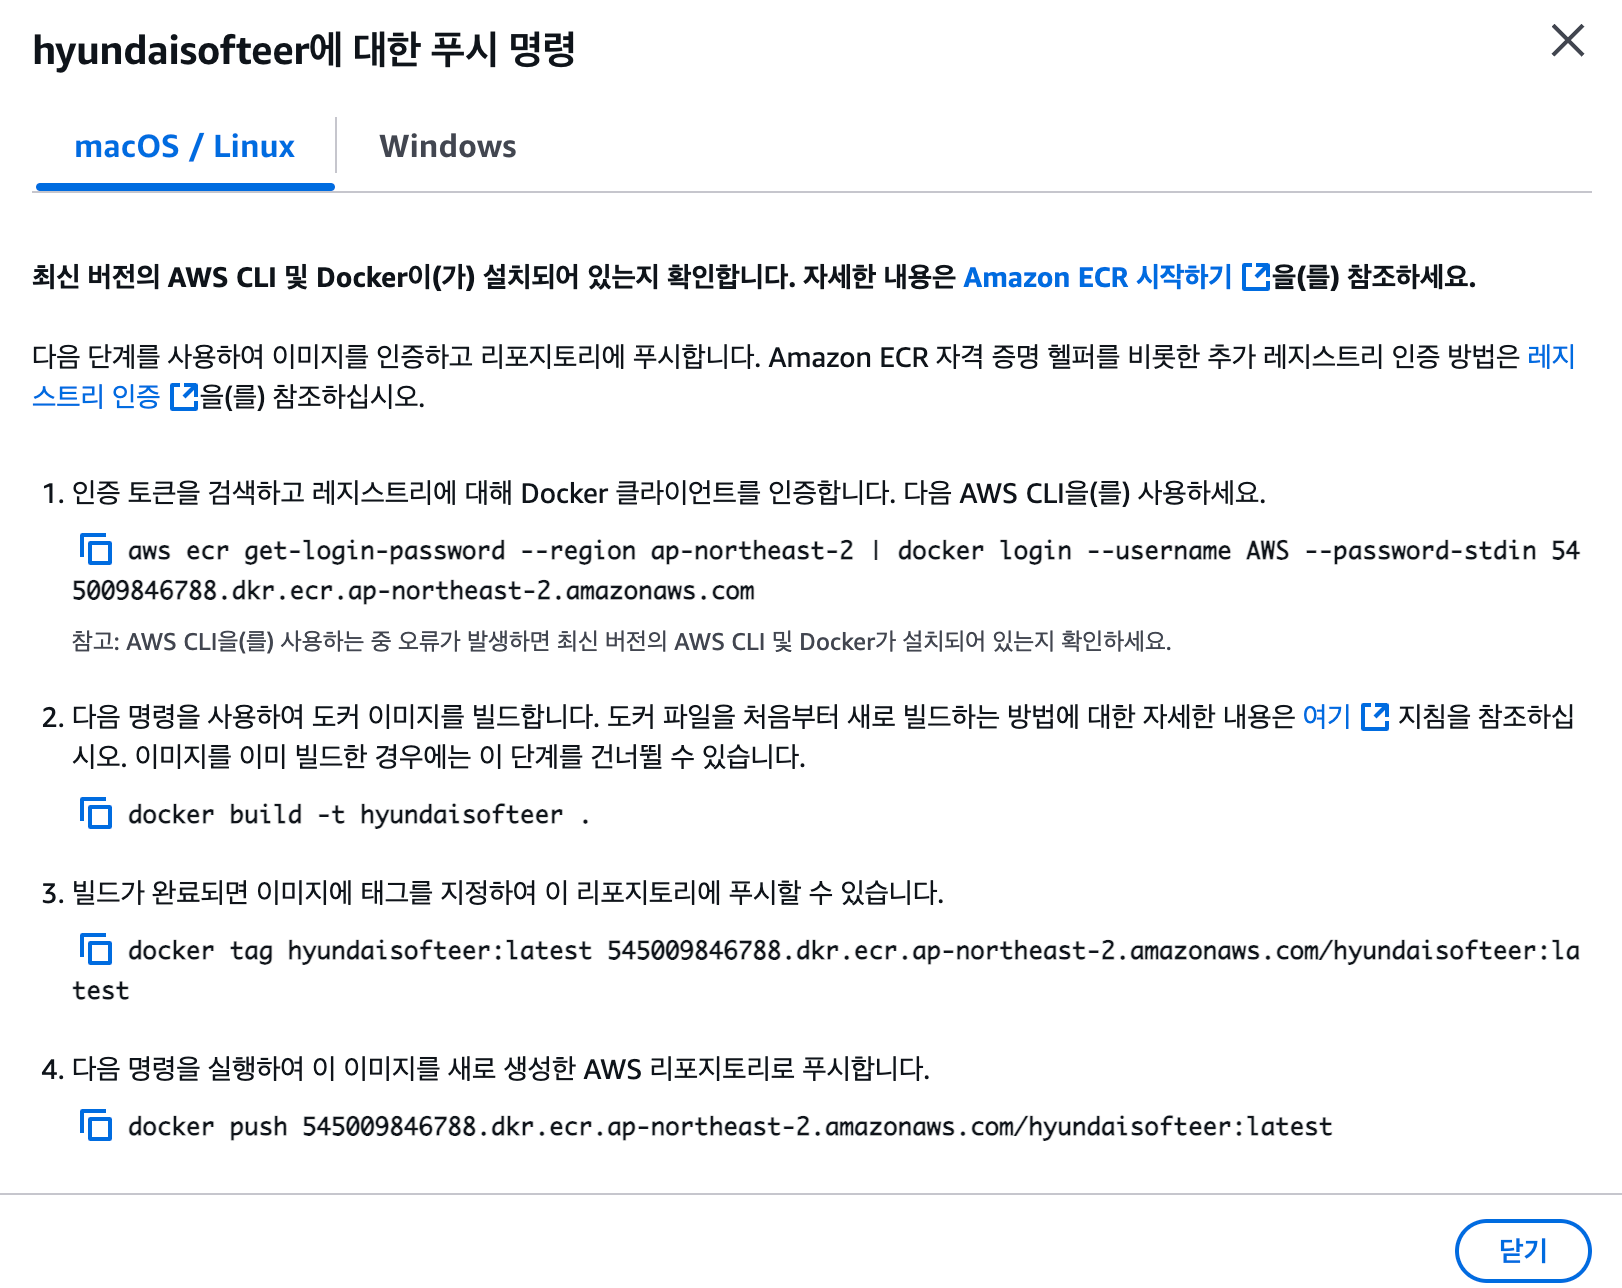